In [1]:
import cv2

In [3]:
#  pip install opencv-python-headless

import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import random

In [5]:
net = cv2.dnn.readNet(r'C:\Users\utkarshsrivasta4\Downloads\YoloModel\YoloModel\yolov3.weights', r'C:\Users\utkarshsrivasta4\Downloads\YoloModel\YoloModel\yolov3.cfg')

In [7]:
labels = []

with open(r'C:\Users\utkarshsrivasta4\Downloads\YoloModel\YoloModel\coco.names', 'r') as f:
    labels = [line.strip() for line in f.readlines()]

In [8]:
layer_names = net.getLayerNames()
output_layers = [layer_names[i-1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0,255,size = (len(labels),3))

In [9]:
layer_names

('conv_0',
 'bn_0',
 'leaky_1',
 'conv_1',
 'bn_1',
 'leaky_2',
 'conv_2',
 'bn_2',
 'leaky_3',
 'conv_3',
 'bn_3',
 'leaky_4',
 'shortcut_4',
 'conv_5',
 'bn_5',
 'leaky_6',
 'conv_6',
 'bn_6',
 'leaky_7',
 'conv_7',
 'bn_7',
 'leaky_8',
 'shortcut_8',
 'conv_9',
 'bn_9',
 'leaky_10',
 'conv_10',
 'bn_10',
 'leaky_11',
 'shortcut_11',
 'conv_12',
 'bn_12',
 'leaky_13',
 'conv_13',
 'bn_13',
 'leaky_14',
 'conv_14',
 'bn_14',
 'leaky_15',
 'shortcut_15',
 'conv_16',
 'bn_16',
 'leaky_17',
 'conv_17',
 'bn_17',
 'leaky_18',
 'shortcut_18',
 'conv_19',
 'bn_19',
 'leaky_20',
 'conv_20',
 'bn_20',
 'leaky_21',
 'shortcut_21',
 'conv_22',
 'bn_22',
 'leaky_23',
 'conv_23',
 'bn_23',
 'leaky_24',
 'shortcut_24',
 'conv_25',
 'bn_25',
 'leaky_26',
 'conv_26',
 'bn_26',
 'leaky_27',
 'shortcut_27',
 'conv_28',
 'bn_28',
 'leaky_29',
 'conv_29',
 'bn_29',
 'leaky_30',
 'shortcut_30',
 'conv_31',
 'bn_31',
 'leaky_32',
 'conv_32',
 'bn_32',
 'leaky_33',
 'shortcut_33',
 'conv_34',
 'bn_34',
 'l

In [10]:
len(layer_names)

254

In [11]:
output_layers

['yolo_82', 'yolo_94', 'yolo_106']

In [12]:
net.getUnconnectedOutLayers()

array([200, 227, 254])

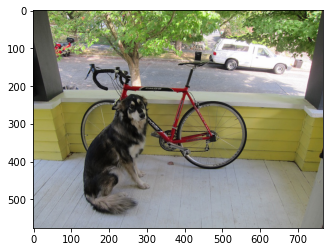

In [23]:
image = plt.imread(r'C:\Users\utkarshsrivasta4\Downloads\YoloModel\YoloModel\dog.jpg')

plt.imshow(image)

height,width,channels = image.shape

In [24]:
blob = cv2.dnn.blobFromImage(image, 0.00392,(416,416),(0,0,0),True,crop = False)

In [25]:
blob

array([[[[0.19600001, 0.20776   , 0.2156    , ..., 0.52136   ,
          0.24304   , 0.17248   ],
         [0.19992   , 0.20384   , 0.21168   , ..., 0.5488    ,
          0.20384   , 0.17248   ],
         [0.20384   , 0.20384   , 0.21168   , ..., 0.53704   ,
          0.14504   , 0.19600001],
         ...,
         [0.69384   , 0.71344   , 0.68992   , ..., 0.46648002,
          0.34496   , 0.18032   ],
         [0.70168   , 0.69776   , 0.67816   , ..., 0.4704    ,
          0.28616   , 0.17248   ],
         [0.69384   , 0.67424   , 0.68992   , ..., 0.45864   ,
          0.28224   , 0.14112   ]],

        [[0.22736001, 0.23912   , 0.24696   , ..., 0.93296003,
          0.48608   , 0.23912   ],
         [0.23128   , 0.2352    , 0.24304   , ..., 0.92904   ,
          0.39592   , 0.2352    ],
         [0.2352    , 0.2352    , 0.24304   , ..., 0.89768   ,
          0.2744    , 0.24696   ],
         ...,
         [0.65072   , 0.67032003, 0.6468    , ..., 0.47824   ,
          0.34888   , 0.1

In [26]:
blob

array([[[[0.19600001, 0.20776   , 0.2156    , ..., 0.52136   ,
          0.24304   , 0.17248   ],
         [0.19992   , 0.20384   , 0.21168   , ..., 0.5488    ,
          0.20384   , 0.17248   ],
         [0.20384   , 0.20384   , 0.21168   , ..., 0.53704   ,
          0.14504   , 0.19600001],
         ...,
         [0.69384   , 0.71344   , 0.68992   , ..., 0.46648002,
          0.34496   , 0.18032   ],
         [0.70168   , 0.69776   , 0.67816   , ..., 0.4704    ,
          0.28616   , 0.17248   ],
         [0.69384   , 0.67424   , 0.68992   , ..., 0.45864   ,
          0.28224   , 0.14112   ]],

        [[0.22736001, 0.23912   , 0.24696   , ..., 0.93296003,
          0.48608   , 0.23912   ],
         [0.23128   , 0.2352    , 0.24304   , ..., 0.92904   ,
          0.39592   , 0.2352    ],
         [0.2352    , 0.2352    , 0.24304   , ..., 0.89768   ,
          0.2744    , 0.24696   ],
         ...,
         [0.65072   , 0.67032003, 0.6468    , ..., 0.47824   ,
          0.34888   , 0.1

In [27]:
net.setInput(blob)
output = net.forward(output_layers)

In [28]:
boxes = []
confidences = []
class_ids = []

In [29]:
for out in output:
    for detection in out:
        scores= detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence>0.5:
            # Object Detected:
            center_x = int(detection[0]*width)
            center_y = int(detection[1]*height)
            w = int(detection[2]*width)
            h = int(detection[3]*height)
            
            # Rectangle Coordinates:
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            
            boxes.append([x,y,w,h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

In [30]:
indexes = cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)
font = cv2.FONT_HERSHEY_PLAIN
for i in range(len(boxes)):
    if i in indexes:
        x,y,w,h = boxes[i]
        label = str(labels[class_ids[i]])
        color = colors[i]
        cv2.rectangle(image,(x,y),(x+w,y+h),color,2)
        cv2.putText(image,label,(x,y+30),font,2,color,3)

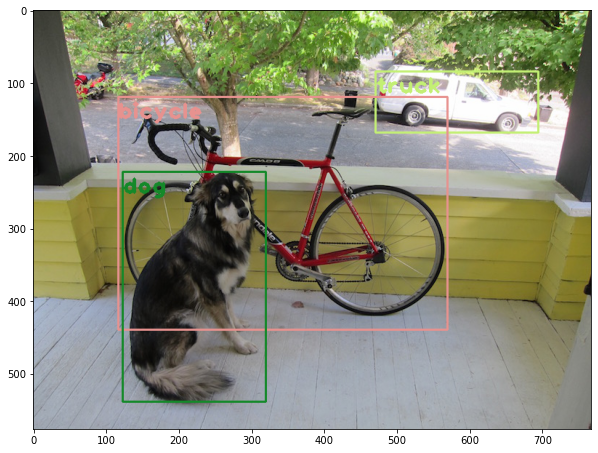

In [31]:
plt.figure(figsize=(10,10))
plt.imshow(image)